# Workshop: ML model deployment


## Prepare Data

In [1]:
import numpy as np 
import pandas as pd 


In [2]:
df_org = pd.read_csv("penguins_size.csv")
df_org.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df = df_org.copy()

In [4]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [5]:
df.isna().sum()/len(df)*100

species              0.000000
island               0.000000
culmen_length_mm     0.581395
culmen_depth_mm      0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  2.906977
dtype: float64

In [10]:
print(df['species'].unique())
print(df['island'].unique())
print(df['sex'].unique())

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
['MALE' 'FEMALE']


In [11]:
df['sex'].mode()[0]

'MALE'

In [12]:
df= df.dropna(subset = ['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm', 'body_mass_g'])
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])
df['sex'] = df['sex'].replace(to_replace='.', value = df['sex'].mode()[0])

In [13]:
df.isna().sum()/len(df)*100

species              0.0
island               0.0
culmen_length_mm     0.0
culmen_depth_mm      0.0
flipper_length_mm    0.0
body_mass_g          0.0
sex                  0.0
dtype: float64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                342 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


In [15]:
#Encoding the object columns.
from sklearn.preprocessing import LabelEncoder

species_encoder = LabelEncoder()
island_encoder = LabelEncoder()
sex_encoder = LabelEncoder()

df['species'] = species_encoder.fit_transform(df['species'])
df['island'] = island_encoder.fit_transform(df['island'])
df['sex'] = sex_encoder.fit_transform(df['sex'])


In [16]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1


In [18]:
#  X = features and y = label/class.
X = df.drop('species', axis=1)
y = df['species']

## Create Model & Evaluate 

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

evaluations = pd.DataFrame(columns=['Accuracy','F1', 'Precision', 'Recall'], index=['Decision Tress', 'Random Forest', 'KNN', 'AdaBoost', 'XGBoost'])


### Decision Tress 

Summary Evaluation: 
               precision    recall  f1-score   support

           0     0.9697    0.9143    0.9412        35
           1     0.7857    0.9167    0.8462        12
           2     1.0000    1.0000    1.0000        22

    accuracy                         0.9420        69
   macro avg     0.9185    0.9437    0.9291        69
weighted avg     0.9474    0.9420    0.9434        69

               Accuracy     F1 Precision Recall
Decision Tress     94.2  94.34     94.74   94.2
Random Forest       NaN    NaN       NaN    NaN
KNN                 NaN    NaN       NaN    NaN
AdaBoost            NaN    NaN       NaN    NaN
XGBoost             NaN    NaN       NaN    NaN


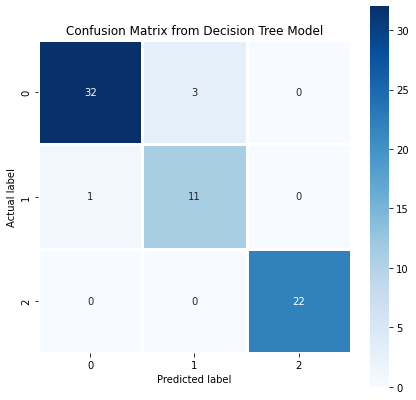

In [20]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier= DecisionTreeClassifier()

dt_classifier.fit(X_train,y_train)
y_pred=dt_classifier.predict(X_test)

summary_eval = classification_report(y_test,y_pred,digits=4)

print("Summary Evaluation: \n",summary_eval)

acc = round(accuracy_score(y_test,y_pred)*100,2)
f1 = round(f1_score(y_test,y_pred,average='weighted')*100,2)
pre = round(precision_score(y_test,y_pred,average='weighted')*100,2)
rec = round(recall_score(y_test,y_pred,average='weighted')*100,2)

evaluations.loc['Decision Tress'] = [acc,f1,pre,rec]
print(evaluations)

cfm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(data=cfm,linewidth=3, annot=True, square=True, cmap='Blues')
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.title("Confusion Matrix from Decision Tree Model")
plt.show()

### Random Forest 

Summary Evaluation: 
               precision    recall  f1-score   support

           0     1.0000    0.9429    0.9706        35
           1     0.8571    1.0000    0.9231        12
           2     1.0000    1.0000    1.0000        22

    accuracy                         0.9710        69
   macro avg     0.9524    0.9810    0.9646        69
weighted avg     0.9752    0.9710    0.9717        69

               Accuracy     F1 Precision Recall
Decision Tress     94.2  94.34     94.74   94.2
Random Forest      97.1  97.17     97.52   97.1
KNN                 NaN    NaN       NaN    NaN
AdaBoost            NaN    NaN       NaN    NaN
XGBoost             NaN    NaN       NaN    NaN


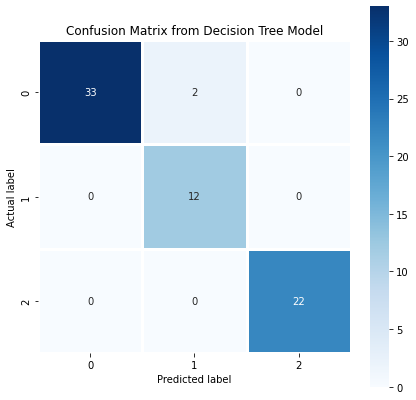

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier=RandomForestClassifier(random_state=0)


rf_classifier.fit(X_train,y_train)
y_pred=rf_classifier.predict(X_test)

summary_eval = classification_report(y_test,y_pred,digits=4)

print("Summary Evaluation: \n",summary_eval)

acc = round(accuracy_score(y_test,y_pred)*100,2)
f1 = round(f1_score(y_test,y_pred,average='weighted')*100,2)
pre = round(precision_score(y_test,y_pred,average='weighted')*100,2)
rec = round(recall_score(y_test,y_pred,average='weighted')*100,2)

evaluations.loc['Random Forest'] = [acc,f1,pre,rec]
print(evaluations)

cfm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(data=cfm,linewidth=3, annot=True, square=True, cmap='Blues')
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.title("Confusion Matrix from Decision Tree Model")
plt.show()


### KNN

Summary Evaluation: 
               precision    recall  f1-score   support

           0     0.7273    0.9143    0.8101        35
           1     0.5000    0.0833    0.1429        12
           2     0.9130    0.9545    0.9333        22

    accuracy                         0.7826        69
   macro avg     0.7134    0.6507    0.6288        69
weighted avg     0.7470    0.7826    0.7334        69

               Accuracy     F1 Precision Recall
Decision Tress     94.2  94.34     94.74   94.2
Random Forest      97.1  97.17     97.52   97.1
KNN               78.26  73.34      74.7  78.26
AdaBoost            NaN    NaN       NaN    NaN
XGBoost             NaN    NaN       NaN    NaN


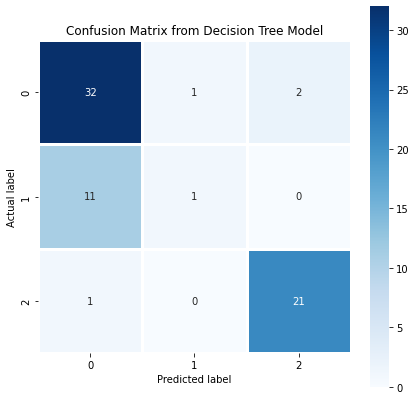

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()


knn_classifier.fit(X_train,y_train)
y_pred=knn_classifier.predict(X_test)

summary_eval = classification_report(y_test,y_pred,digits=4)

print("Summary Evaluation: \n",summary_eval)

acc = round(accuracy_score(y_test,y_pred)*100,2)
f1 = round(f1_score(y_test,y_pred,average='weighted')*100,2)
pre = round(precision_score(y_test,y_pred,average='weighted')*100,2)
rec = round(recall_score(y_test,y_pred,average='weighted')*100,2)

evaluations.loc['KNN'] = [acc,f1,pre,rec]
print(evaluations)

cfm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(data=cfm,linewidth=3, annot=True, square=True, cmap='Blues')
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.title("Confusion Matrix from Decision Tree Model")
plt.show()

### AdaBoost Classifier

Summary Evaluation: 
               precision    recall  f1-score   support

           0     0.7143    1.0000    0.8333        35
           1     0.0000    0.0000    0.0000        12
           2     1.0000    0.9091    0.9524        22

    accuracy                         0.7971        69
   macro avg     0.5714    0.6364    0.5952        69
weighted avg     0.6812    0.7971    0.7264        69

               Accuracy     F1 Precision Recall
Decision Tress     94.2  94.34     94.74   94.2
Random Forest      97.1  97.17     97.52   97.1
KNN               78.26  73.34      74.7  78.26
AdaBoost          79.71  72.64     68.12  79.71
XGBoost             NaN    NaN       NaN    NaN


D:\New folder (2)\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\New folder (2)\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\New folder (2)\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\New folder (2)\lib\site-packages\sklearn\metrics\_classification.py:1318:

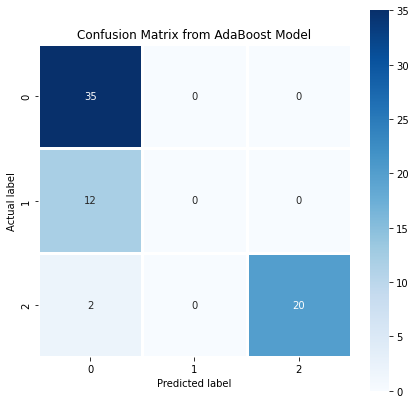

In [23]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier = AdaBoostClassifier()

ada_classifier.fit(X_train,y_train)
y_pred=ada_classifier.predict(X_test)

summary_eval = classification_report(y_test,y_pred,digits=4)

print("Summary Evaluation: \n",summary_eval)

acc = round(accuracy_score(y_test,y_pred)*100,2)
f1 = round(f1_score(y_test,y_pred,average='weighted')*100,2)
pre = round(precision_score(y_test,y_pred,average='weighted')*100,2)
rec = round(recall_score(y_test,y_pred,average='weighted')*100,2)

evaluations.loc['AdaBoost'] = [acc,f1,pre,rec]
print(evaluations)

cfm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(data=cfm,linewidth=3, annot=True, square=True, cmap='Blues')
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.title("Confusion Matrix from AdaBoost Model")
plt.show()





### XGBoost

In [28]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


Summary Evaluation: 
               precision    recall  f1-score   support

           0     0.9429    0.9429    0.9429        35
           1     0.8333    0.8333    0.8333        12
           2     1.0000    1.0000    1.0000        22

    accuracy                         0.9420        69
   macro avg     0.9254    0.9254    0.9254        69
weighted avg     0.9420    0.9420    0.9420        69

               Accuracy     F1 Precision Recall
Decision Tress     94.2  94.34     94.74   94.2
Random Forest      97.1  97.17     97.52   97.1
KNN               78.26  73.34      74.7  78.26
AdaBoost          79.71  72.64     68.12  79.71
XGBoost            94.2   94.2      94.2   94.2


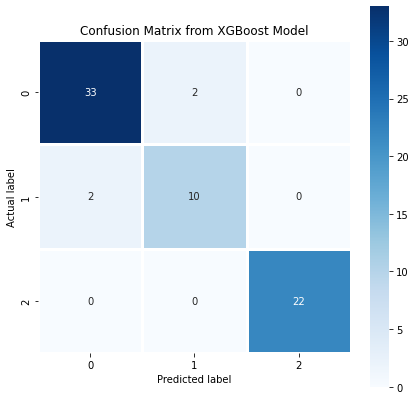

In [29]:

from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')


xgb_classifier.fit(X_train,y_train)
y_pred=xgb_classifier.predict(X_test)

summary_eval = classification_report(y_test,y_pred,digits=4)

print("Summary Evaluation: \n",summary_eval)

acc = round(accuracy_score(y_test,y_pred)*100,2)
f1 = round(f1_score(y_test,y_pred,average='weighted')*100,2)
pre = round(precision_score(y_test,y_pred,average='weighted')*100,2)
rec = round(recall_score(y_test,y_pred,average='weighted')*100,2)

evaluations.loc['XGBoost'] = [acc,f1,pre,rec]
print(evaluations)

cfm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(data=cfm,linewidth=3, annot=True, square=True, cmap='Blues')
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.title("Confusion Matrix from XGBoost Model")
plt.show()




### All Evaluations

In [30]:
evaluations

,Accuracy,F1,Precision,Recall
Decision Tress,94.2,94.34,94.74,94.2
Random Forest,97.1,97.17,97.52,97.1
KNN,78.26,73.34,74.7,78.26
AdaBoost,79.71,72.64,68.12,79.71
XGBoost,94.2,94.2,94.2,94.2


## Create Model &  Save Model

In [31]:
# Random Forest outperform others
import pickle
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(random_state=0)
model.fit(X,y)

pickle.dump(model, open('model.penguins.sav', 'wb'))
pickle.dump(species_encoder, open('encoder.species.sav', 'wb'))
pickle.dump(island_encoder, open('encoder.island.sav', 'wb'))
pickle.dump(sex_encoder, open('encoder.sex.sav', 'wb'))
pickle.dump(evaluations, open('evals.all.sav', 'wb'))



## Create file.py for Running with Command Line 

In [32]:

import numpy as np
import pandas as pd
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

model = pickle.load(open('model.penguins.sav','rb'))
species_encoder = pickle.load(open('encoder.species.sav','rb'))
island_encoder = pickle.load(open('encoder.island.sav','rb'))
sex_encoder = pickle.load(open('encoder.sex.sav','rb'))
evaluations = pickle.load(open('evals.all.sav','rb'))

x1= ['Torgersen']
x1= island_encoder.transform(x1)[0]
x2 =37.0
x3 =19.3
x4 =192.3
x5 = 3750.0
x6 = ['MALE']
x6 = sex_encoder.transform(x6)[0]

x_new = pd.DataFrame(data=np.array([x1, x2, x3, x4, x5, x6]).reshape(1,-1), 
             columns=['island', 'culmen_length_mm', 'culmen_depth_mm','flipper_length_mm', 'body_mass_g', 'sex'])

pred = model.predict(x_new)
print('Predicted Species: ' , species_encoder.inverse_transform(pred)[0])

    

Predicted Species:  Adelie


In [33]:
%%writefile predict_penguin.py

import numpy as np
import pandas as pd
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

model = pickle.load(open('model.penguins.sav','rb'))
species_encoder = pickle.load(open('encoder.species.sav','rb'))
island_encoder = pickle.load(open('encoder.island.sav','rb'))
sex_encoder = pickle.load(open('encoder.sex.sav','rb'))
evaluations = pickle.load(open('evals.all.sav','rb'))

print('island list: ', island_encoder.classes_)
x1= input("Enter island >> ")  #['Torgersen']

while ([x1] not in island_encoder.classes_):
    print("Try again, select from this list: ", island_encoder.classes_)
    x1= input('Enter island >> ') 
    
x1= island_encoder.transform([x1])[0]

x2 = float(input('Enter culmen length (mm) >> ')) #37.0
x3 = float(input('Enter culmen depth (mm) >> ')) #19.3
x4 = float(input('Enter flipper length (mm) >> ')) #192.3
x5 = float(input('Enter body mass (g) >> ')) #3750.0

print('sex list: ',sex_encoder.classes_ )
x6 = input('Enter sex >> ')  # ['MALE']
while ([x6] not in sex_encoder.classes_):
    print("Try again, select from this list: ", sex_encoder.classes_)
    x6= input('Enter sex >> ') 
x6 = sex_encoder.transform([x6])[0]

x_new = pd.DataFrame(data=np.array([x1, x2, x3, x4, x5, x6]).reshape(1,-1), 
             columns=['island', 'culmen_length_mm', 'culmen_depth_mm','flipper_length_mm', 'body_mass_g', 'sex'])

pred = model.predict(x_new)
print('Predicted Species: ' , species_encoder.inverse_transform(pred)[0])


Writing predict_penguin.py


## Deploy Model for Web App using Streamlit
- pip install streamlit
- https://docs.streamlit.io/knowledge-base/using-streamlit/how-do-i-run-my-streamlit-script
- https://docs.streamlit.io/library/api-reference
- https://streamlit.io/
- https://github.com/

In [1]:
%%writefile app_predict_penguin.py

import numpy as np
import pandas as pd
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import streamlit as st 

tab1, tab2, tab3 = st.tabs(["Cat", "Dog", "Owl"])

with tab1:
   st.header("A cat")
   st.image("https://static.streamlit.io/examples/cat.jpg", width=200)

model = pickle.load(open('model.penguins.sav','rb'))
species_encoder = pickle.load(open('encoder.species.sav','rb'))
island_encoder = pickle.load(open('encoder.island.sav','rb'))
sex_encoder = pickle.load(open('encoder.sex.sav','rb'))
evaluations = pickle.load(open('evals.all.sav','rb'))

st.title('Penguin Species Prection :) ')

x1 = st.radio('Select island', island_encoder.classes_)
x1 = island_encoder.transform([x1])[0]
# x1 
x2 = st.slider('Select culmen length (mm)', 25, 70, 40)
x3 = st.slider("เลือก culmen depth (mm)", 10,30,15 )
x4 = st.slider("เลือก flipper length (mm)", 150,250,200)
x5 = st.slider("เลือก body mass (g)", 2500,6500,3000)
x6 = st.radio("เลือก sex ",sex_encoder.classes_)
x6 = sex_encoder.transform([x6])[0]

x_new = pd.DataFrame(data=np.array([x1, x2, x3, x4, x5, x6]).reshape(1,-1), 
             columns=['island', 'culmen_length_mm', 'culmen_depth_mm','flipper_length_mm', 'body_mass_g', 'sex'])

pred = model.predict(x_new)

st.write('Predicted Species: ' , species_encoder.inverse_transform(pred)[0])



Overwriting app_predict_penguin.py


In [2]:
df['culmen_length_mm'].max()

NameError: name 'df' is not defined

In [36]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [40]:
%%writefile app_penguin.py

import streamlit as st 
from streamlit_option_menu import option_menu
import plotly.graph_objects as px
import numpy as np
import pandas as pd
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier


model = pickle.load(open('model.penguins.sav','rb'))
species_encoder = pickle.load(open('encoder.species.sav','rb'))
island_encoder = pickle.load(open('encoder.island.sav','rb'))
sex_encoder = pickle.load(open('encoder.sex.sav','rb'))
evaluations = pickle.load(open('evals.all.sav','rb'))


st.set_page_config(
    page_title="Penguin",
    layout="wide"
)

st.title("Penguin Species Predition")

'''
## Penguin .... ^.^ 

เพกวินเป็นนก ... แต่บินไม่ได้

'''
    
with st.sidebar:
        menuItem = option_menu("Penguin",
                               ["Prediction", "Evaluation"],
                               icons=["magic", "file-bar-graph-fill"],
                               menu_icon='house',
                               default_index=0,
                               styles={
                                   "container": {"padding": "5!important", "background-color": "#fafafa"},
                                   "icon": {"color": "black", "font-size": "25px"},
                                   "nav-link": {"font-size": "16px", "text-align": "left", "margin": "0px",
                                                "--hover-color": "#eee"},
                                   "nav-link-selected": {"background-color": "#037ffc"},
                               })

        
if menuItem == "Prediction":
    
    x1 = st.radio("เลือก island ",island_encoder.classes_)
    x1 = island_encoder.transform([x1])[0]
    x2 = st.slider("เลือก culmen length (mm)", 20,70,35 )
    x3 = st.slider("เลือก culmen depth (mm)", 10,30,15 )
    x4 = st.slider("เลือก flipper length (mm)", 150,250,200)
    x5 = st.slider("เลือก body mass (g)", 2500,6500,3000)
    x6 = st.radio("เลือก sex ",sex_encoder.classes_)
    x6 = sex_encoder.transform([x6])[0]
    x_new = pd.DataFrame(data=np.array([x1, x2, x3, x4, x5, x6]).reshape(1,-1), 
                 columns=['island', 'culmen_length_mm', 'culmen_depth_mm','flipper_length_mm', 'body_mass_g', 'sex'])

    pred = model.predict(x_new)

    html_str = f"""
    <style>
    p.a {{
      font: bold {30}px Courier;
    }}
    </style>
    <p class="a">{species_encoder.inverse_transform(pred)[0]}</p>
    """

    st.markdown('### Predicted Species: ' )
    st.markdown(html_str, unsafe_allow_html=True)

if menuItem == "Evaluation":
   
    x = evaluations.columns
    fig = px.Figure(data=[
        px.Bar(name = 'Decision Tree',
               x = x,
               y = evaluations.loc['Decision Tress']),
        px.Bar(name = 'Random Forest',
               x = x,
               y =  evaluations.loc['Random Forest']),
        px.Bar(name = 'KNN',
               x = x,
               y =  evaluations.loc['KNN']),
        px.Bar(name = 'AdaBoost',
               x = x,
               y =  evaluations.loc['AdaBoost']),
        px.Bar(name = 'XGBoost',
               x = x,
               y =  evaluations.loc['XGBoost'])
    ])
    st.plotly_chart(fig, use_container_width=True)

    st.dataframe(evaluations)
    

Overwriting app_penguin.py


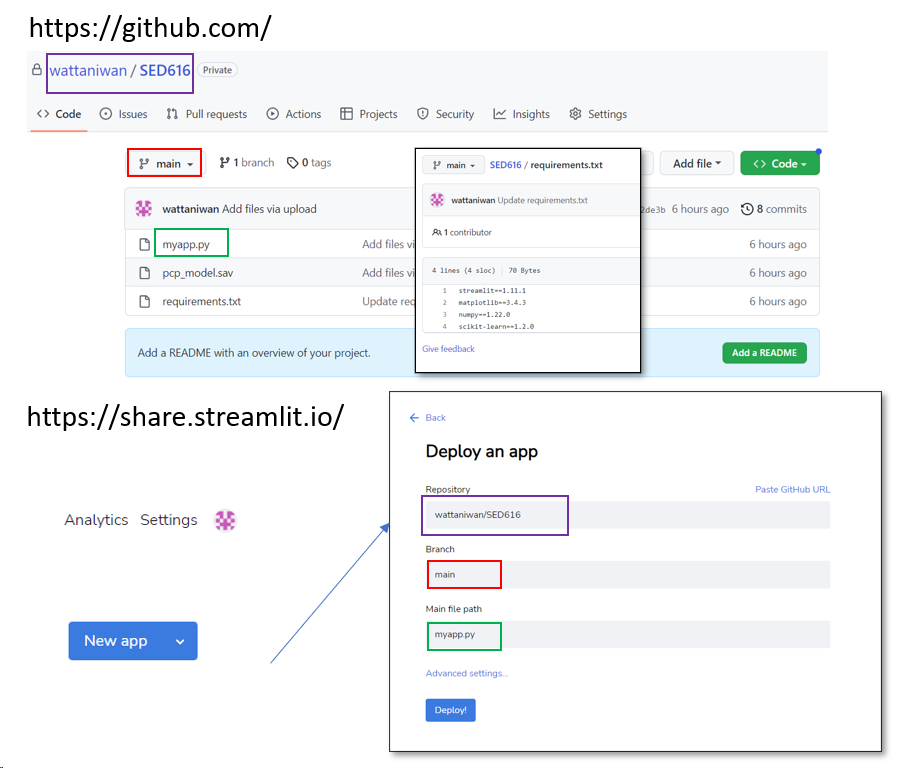